In [ ]:
#Sahar Ismail Sultan

In [ ]:
# استيراد المكتبات اللازمة
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

file_path = "/content/drive/My Drive/Colab Notebooks/Salary_Data.csv"
iris_data = np.genfromtxt(file_path, delimiter=",", skip_header=1)


In [ ]:

# تحميل البيانات من ملف CSV
df = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [ ]:

# استكشاف المعلومات الأساسية
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None


In [ ]:
# استكشاف الوصف الإحصائي للبيانات
print(df.describe())


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


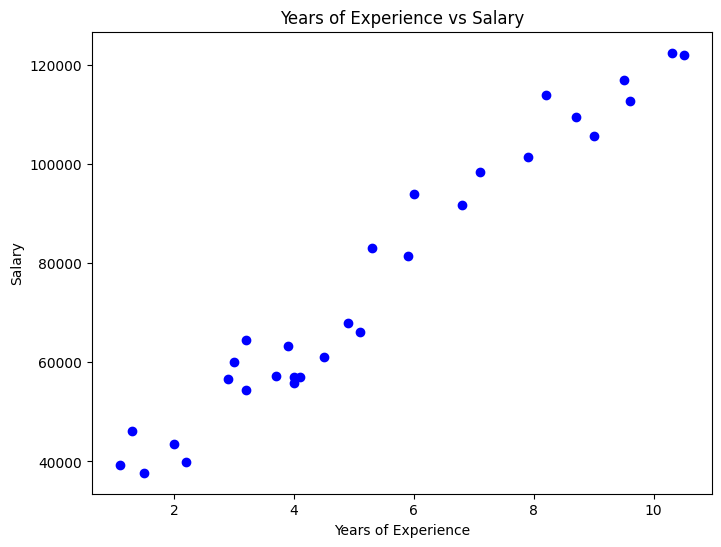

In [ ]:
# تصوّر العلاقة بين YearsExperience و Salary باستخدام scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
# إضافة عمود التصنيف based on whether salary is above or below the mean
mean_salary = df['Salary'].mean()
df['SalaryCategory'] = ['High' if salary >= mean_salary else 'Low' for salary in df['Salary']]

# عرض البيانات مع العمود الجديد
print(df.head())


   YearsExperience  Salary SalaryCategory
0              1.1   39343            Low
1              1.3   46205            Low
2              1.5   37731            Low
3              2.0   43525            Low
4              2.2   39891            Low


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى المدخلات (X) والهدف (y)
X = df[['YearsExperience']]  # المدخلات
y = df['SalaryCategory']     # الهدف

# تقسيم البيانات إلى تدريب واختبار بنسبة 70% تدريب و 30% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data:", len(X_train), "Testing data:", len(X_test))


Training data: 21 Testing data: 9


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# تحويل التصنيف النصي إلى قيم عددية
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# تدريب نموذج KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_encoded)

# التنبؤ باستخدام البيانات الاختبارية
y_pred = knn.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 1.0
Confusion Matrix:
[[5 0]
 [0 4]]


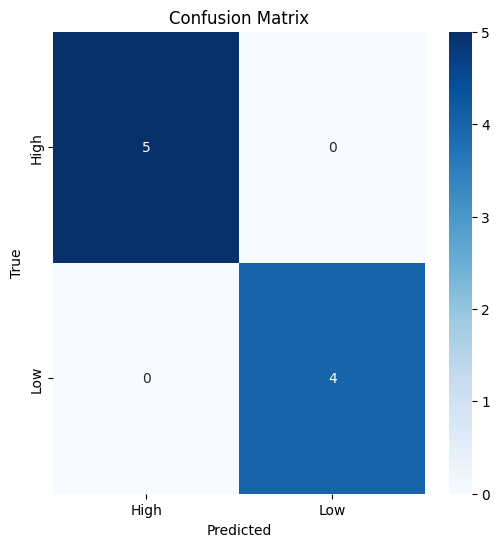

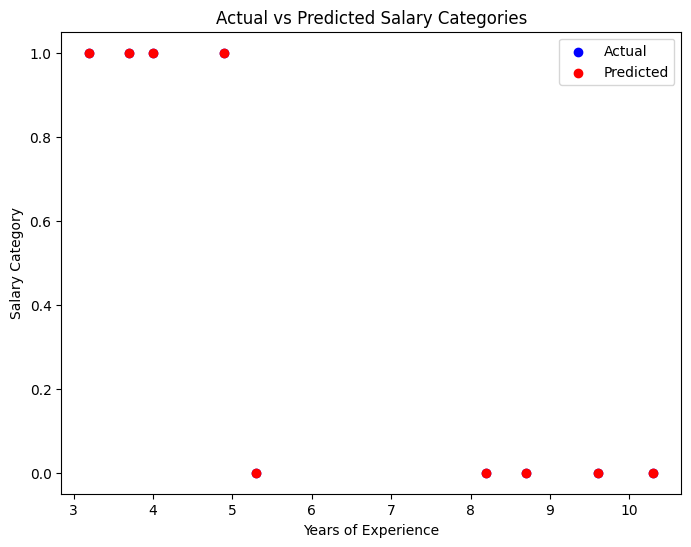

In [ ]:
# تصوّر مصفوفة الارتباك
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# تصوّر التوزيع الفعلي للملاحظات
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test_encoded, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Salary Categories')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Category')
plt.legend()
plt.show()


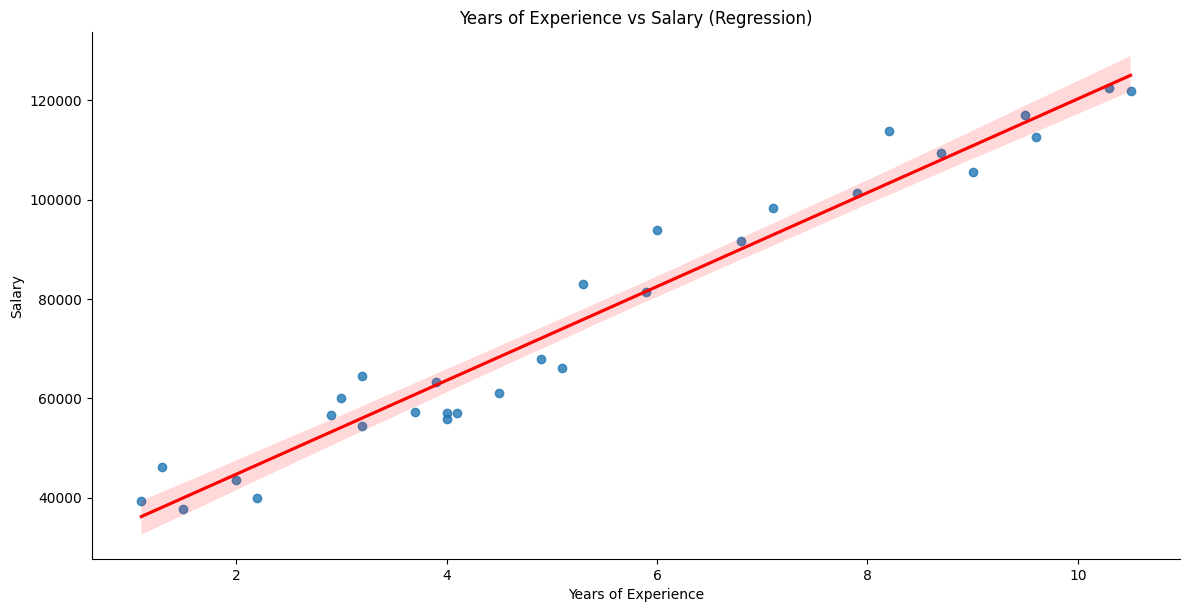

In [ ]:
import seaborn as sns

# رسم بياني باستخدام Seaborn لإظهار العلاقة بين الخبرة والراتب
sns.lmplot(x='YearsExperience', y='Salary', data=df, aspect=2, height=6, line_kws={'color': 'red'})
plt.title('Years of Experience vs Salary (Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


<ipython-input-36-eae8c53e2d0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalaryCategory', data=df, palette='viridis')


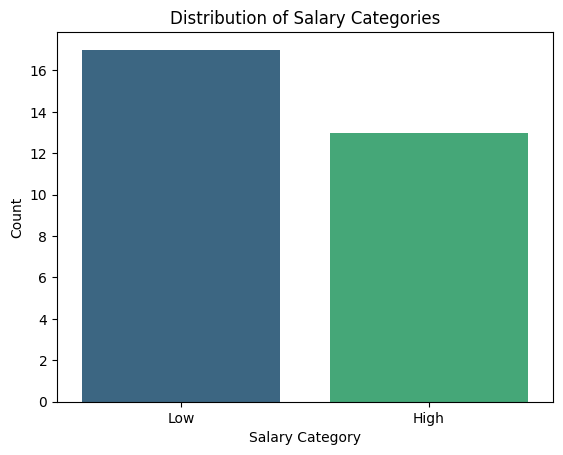

In [ ]:
# رسم بياني شريطي بناءً على تصنيف الخبرة (Low, High Salary)
sns.countplot(x='SalaryCategory', data=df, palette='viridis')
plt.title('Distribution of Salary Categories')
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.show()


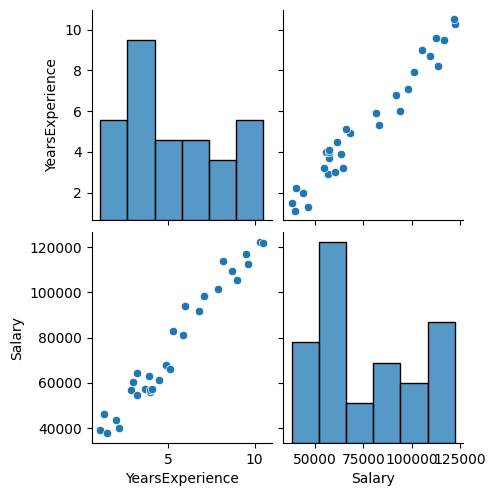

In [ ]:
# رسم بياني لتوزيع جميع الأعمدة في البيانات
sns.pairplot(df)
plt.show()



<ipython-input-38-8460721c4263>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SalaryCategory', y='Salary', data=df, palette='Set2')


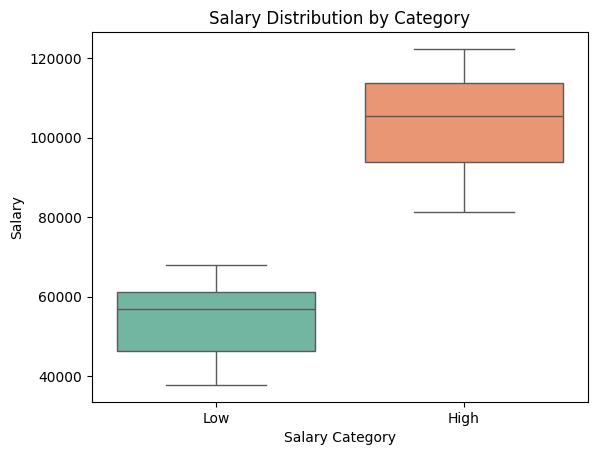

In [ ]:
# رسم Box Plot لعرض توزيع الرواتب حسب التصنيف
sns.boxplot(x='SalaryCategory', y='Salary', data=df, palette='Set2')
plt.title('Salary Distribution by Category')
plt.xlabel('Salary Category')
plt.ylabel('Salary')
plt.show()


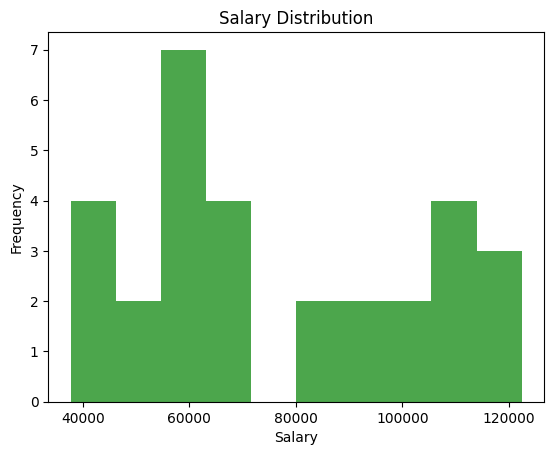

In [ ]:
# رسم Histogram لعرض توزيع الرواتب
plt.hist(df['Salary'], bins=10, color='green', alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


التنبؤات بالرواتب: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
التنبؤات للسنوات الجديدة: [119559.73624209 166678.81285724 213797.8894724 ]


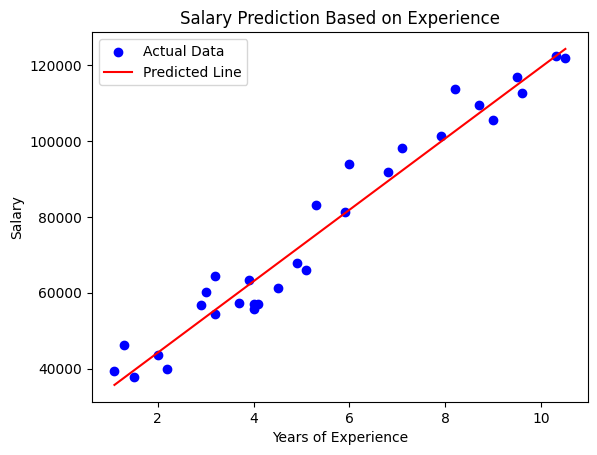

In [ ]:
# استيراد المكتبات المطلوبة
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# البيانات الأصلية (على سبيل المثال)
# البيانات هي سنوات الخبرة والرواتب
# سنقوم بتخزينها في X (سنوات الخبرة) و y (الرواتب)
X = df[['YearsExperience']].values  # بيانات سنوات الخبرة
y = df['Salary'].values  # بيانات الرواتب

# تقسيم البيانات إلى بيانات تدريب واختبار (80% تدريب و 20% اختبار)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج الانحدار الخطي
model = LinearRegression()

# تدريب النموذج باستخدام البيانات التدريبية
model.fit(X_train, y_train)

# التنبؤ بالرواتب باستخدام بيانات الاختبار
y_pred = model.predict(X_test)

# عرض نتائج التنبؤ
print("التنبؤات بالرواتب:", y_pred)

# التنبؤ برواتب جديدة (سنوات خبرة جديدة)
new_experience = np.array([[10], [15], [20]])  # سنوات خبرة جديدة للتنبؤ بالرواتب
new_predictions = model.predict(new_experience)

print("التنبؤات للسنوات الجديدة:", new_predictions)

# رسم البيانات الأصلية والخط التنبؤي
plt.scatter(X, y, color='blue', label='Actual Data')  # بيانات الرواتب الأصلية
plt.plot(X, model.predict(X), color='red', label='Predicted Line')  # الخط التنبؤي
plt.title('Salary Prediction Based on Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interact

# إعداد البيانات
data = {
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [40000, 42000, 44000, 46000, 50000, 55000, 60000, 65000, 70000, 75000]
}

df = pd.DataFrame(data)

# إعداد النموذج
X = df[['YearsExperience']]  # سنوات الخبرة
y = df['Salary']  # الرواتب

model = LinearRegression()
model.fit(X, y)

# دالة التنبؤ
def predict_salary(years_of_experience):
    predicted_salary = model.predict([[years_of_experience]])
    print(f"الراتب المتوقع بناءً على {years_of_experience} سنوات من الخبرة هو: {predicted_salary[0]:,.2f} ريال سعودي.")

# إنشاء شريط تمرير للتفاعل
experience_slider = widgets.IntSlider(min=0, max=20, step=1, value=5)

# عرض الواجهة التفاعلية
interact(predict_salary, years_of_experience=experience_slider)


interactive(children=(IntSlider(value=5, description='years_of_experience', max=20), Output()), _dom_classes=(…

<function __main__.predict_salary(years_of_experience)>